In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.utils.data import random_split
import numpy as np
from PIL import Image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision.transforms as tfms

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from dataset_custom_2 import CustomDataset
from torchvision import transforms
paths_train = []
paths_valid = []
train_valid_split = 0.85

device = 'mps' #for my macbook
# Define transforms
transform = tfms.Compose([
            tfms.ToPILImage(),
            tfms.Resize((512, 512),antialias=True),
            tfms.ToTensor(),  # Converts to float and normalizes to [0, 1]
        ])

# Define the dataset
dataset = CustomDataset('Segmentation_data/phase_map_fig4s', 'Segmentation_data/phase_map_fig3s', transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

<class 'tuple'>


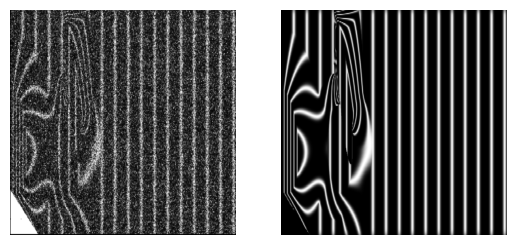

In [11]:
""" 
plot the first image with its target image in the dataset side by side
"""
print(type(train_dataset[0]))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(train_dataset[0][0].squeeze(), cmap='gray')
ax[0].axis('off')
ax[1].imshow(train_dataset[0][1].squeeze(), cmap='gray')
ax[1].axis('off')
plt.show()

In [27]:
from model_denoise_2 import DenoiseAutoencoder
device = torch.device('mps')
net = DenoiseAutoencoder().to(device)

In [28]:
from train_loss_2 import train_valid_loop

In [29]:

image_test= train_dataset[0][0].unsqueeze(0)
image_test = image_test.to(device)
output = net(image_test)
print(output.shape)


torch.Size([1, 1, 512, 512])


In [30]:
train_loss, valid_loss = train_valid_loop(net, train_loader, val_loader, Nepochs=35, learning_rate=1e-3)

Found MPS!


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch:  0  Train loss:  0.12415180699899793  Valid loss:  0.05869524627923965
Model saved!
Epoch:  1  Train loss:  0.05152677912265062  Valid loss:  0.04574194364249706
Model saved!
Epoch:  2  Train loss:  0.044805061724036935  Valid loss:  0.04154554717242718
Model saved!
Epoch:  3  Train loss:  0.04149494031444192  Valid loss:  0.038663023710250856
Model saved!
Epoch:  4  Train loss:  0.03756892252713442  Valid loss:  0.03496698997914791
Model saved!
Epoch:  5  Train loss:  0.03473140886053443  Valid loss:  0.032192323729395865
Model saved!
Epoch:  6  Train loss:  0.032495826575905086  Valid loss:  0.029936601780354975
Model saved!
Epoch:  7  Train loss:  0.029254073509946465  Valid loss:  0.027751831337809563
Model saved!
Epoch:  8  Train loss:  0.02851865431293845  Valid loss:  0.027271460741758347
Model saved!
Epoch:  9  Train loss:  0.02752986610867083  Valid loss:  0.02471320629119873
Model saved!
Epoch:  10  Train loss:  0.024824999226257204  Valid loss:  0.024216957204043866
M

KeyboardInterrupt: 

In [31]:
train_loss, valid_loss = train_valid_loop(net, train_loader, val_loader, Nepochs=30, learning_rate=1e-4)

Found MPS!


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch:  0  Train loss:  0.0040782398835290225  Valid loss:  0.004199083941057324
Model saved!
Epoch:  1  Train loss:  0.004052439006045461  Valid loss:  0.004183457489125431
Model saved!
Epoch:  2  Train loss:  0.0040455549082253125  Valid loss:  0.004161036107689142
Epoch:  3  Train loss:  0.003999301581643522  Valid loss:  0.004164847079664469
Model saved!
Epoch:  4  Train loss:  0.00399145059636794  Valid loss:  0.004153774003498256
Model saved!
Epoch:  5  Train loss:  0.003908891830360517  Valid loss:  0.004118489660322666
Epoch:  6  Train loss:  0.0039603909361176194  Valid loss:  0.0041296763578429815
Epoch:  7  Train loss:  0.003899896307848394  Valid loss:  0.004126895987428725
Model saved!
Epoch:  8  Train loss:  0.003911640262231231  Valid loss:  0.004107854887843132
Epoch:  9  Train loss:  0.003878147987416014  Valid loss:  0.004112344840541482
Epoch:  10  Train loss:  0.003921703615924343  Valid loss:  0.004112290125340224
Model saved!
Epoch:  11  Train loss:  0.00391903494

KeyboardInterrupt: 

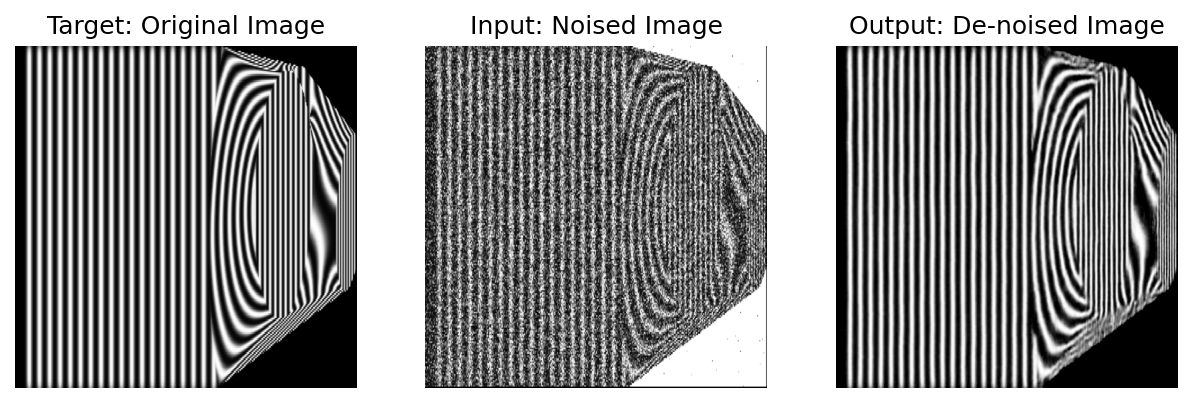

In [32]:
x, y = val_dataset[-1]

# Add a batch dimension to the input tensor
x = x.unsqueeze(0)

net.eval()
# Move the input tensor to the 'mps' device
x_mps = x.to(device)
net = net.to(device)
# Pass the input through the model and detach the output
xprime = net(x_mps).detach()

# Move the output tensor back to the CPU and convert to NumPy array
xprime_cpu = xprime.cpu().numpy()

# Remove the batch dimension for visualization
xprime_cpu = xprime_cpu.squeeze(0)
x = x.squeeze(0)
y = y.squeeze(0)

# Plot the images
fig, ax = plt.subplots(1, 3, figsize=(10, 3), dpi=150)

ax[0].imshow(y, cmap='Greys_r', vmin=0, vmax=1)
ax[0].set_title('Target: Original Image')
ax[1].imshow(x.squeeze(0), cmap='Greys_r', vmin=0, vmax=1)
ax[1].set_title('Input: Noised Image')
ax[2].imshow(xprime_cpu.squeeze(0), cmap='Greys_r', vmin=0, vmax=1)
ax[2].set_title('Output: De-noised Image')

for i in range(3):
    ax[i].set_axis_off()

plt.show()

In [173]:
from model_denoise import DenoiseAutoencoder
model = DenoiseAutoencoder()
model.load_state_dict(torch.load('models_saved/saved_model_gamma_onlatent_1.pt'))

<All keys matched successfully>

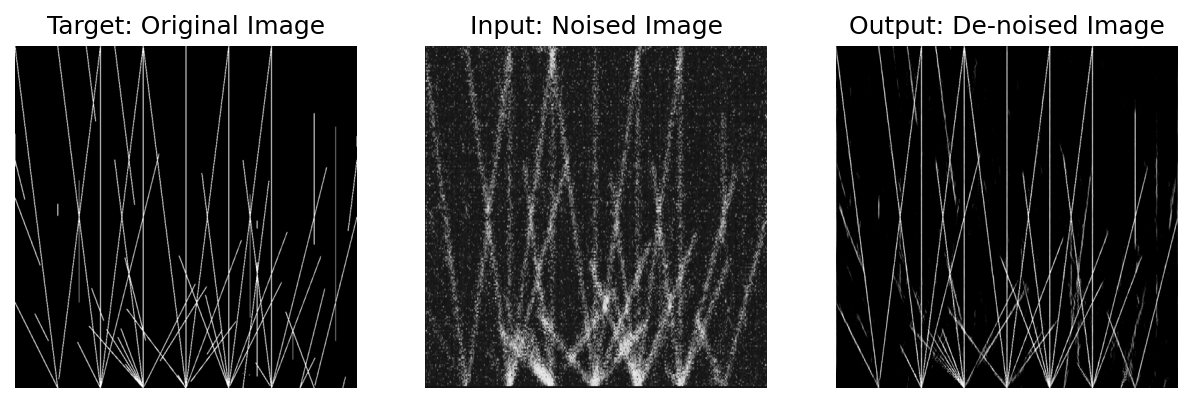

In [174]:
x, y = valid_ds[-1]
device = 'mps'  
model.to(device)
x_mps = x.unsqueeze(0).to(device)

# Now, perform the forward pass
xprime = model(x_mps).detach()
xprime_cpu = xprime.cpu().numpy()

fig,ax = plt.subplots(1,3,figsize=(10,3),dpi=150)

ax[0].imshow(y.squeeze(0),cmap='Greys_r',vmin=0,vmax=1)
ax[0].set_title('Target: Original Image')
ax[1].imshow(x.squeeze(0),cmap='Greys_r',vmin=0,vmax=1)
ax[1].set_title('Input: Noised Image')
ax[2].imshow(xprime_cpu.squeeze(),cmap='Greys_r',vmin=0,vmax=1)
ax[2].set_title('Output: De-noised Image')

for i in range(3):
    ax[i].set_axis_off()

plt.show()

In [ ]:
x, y = valid_ds[-1]
device = 'mps'  
net.to(device)
x_mps = x.unsqueeze(0).to(device)

# Now, perform the forward pass
xprime = net(x_mps).detach()
xprime_cpu = xprime.cpu().numpy()


fig,ax = plt.subplots(1,2,dpi=150)

ax[0].imshow(y.squeeze(0),cmap='Greys_r',vmin=0,vmax=1)
ax[0].set_title('Target: Original Image')
# ax[1].imshow(x.squeeze(0),cmap='Greys_r',vmin=0,vmax=1)
# ax[1].set_title('Input: Noised Image')
ax[1].imshow(xprime_cpu.squeeze(),cmap='Greys_r',vmin=0,vmax=1)
ax[1].set_title('Output: De-noised Image')

for i in range(2):
    ax[i].set_axis_off()

plt.show()

In [11]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [199]:
import cv2
def thicken_lines(img, kernel_size=(2,2), iterations=2):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    dilated_img = cv2.dilate(img, kernel, iterations=iterations)
    return dilated_img

(32, 1, 2)


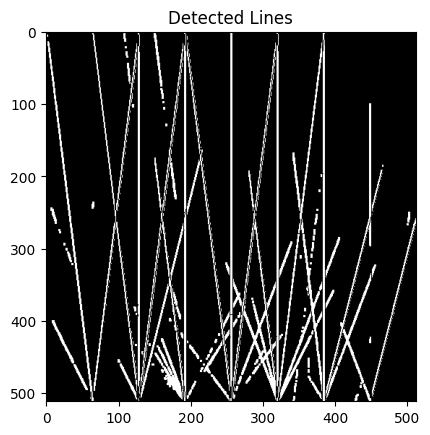

In [200]:

gray = xprime_cpu.squeeze()
gray = thicken_lines(gray)
gray = cv2.convertScaleAbs(gray)
edges = cv2.Canny(gray, 50, 100, apertureSize=7)

# linesP = cv2.HoughLinesP(gray, 1, np.pi/180, 70, minLineLength=20, maxLineGap=100)
# if linesP is not None:
#     for line in linesP:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(gray, (x1, y1), (x2, y2), (0, 255, 0), 2)


# Using HoughLines method
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
print(lines.shape)

if lines is not None:
    for rho, theta in lines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(gray, (x1, y1), (x2, y2), (0, 0, 255),1)


# # Display the result
plt.imshow(gray, cmap='gray')
plt.title('Detected Lines')
plt.show()
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# plt.title('Detected Lines')
# plt.show()
# thickened_image = thicken_lines(gray)
# thickened_image = cv2.convertScaleAbs(thickened_image)
# plt.imshow(thickened_image, cmap='gray')


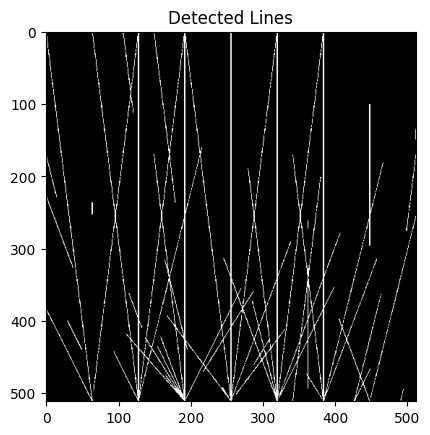

In [198]:
ygray = y.squeeze().numpy()
yggray = thicken_lines(ygray)
# yggray = cv2.convertScaleAbs(yggray)
ygray = cv2.convertScaleAbs(ygray)
yedges = cv2.Canny(ygray, 50, 100, apertureSize=3)

# linesP = cv2.HoughLinesP(gray, 1, np.pi/180, 70, minLineLength=20, maxLineGap=100)
# if linesP is not None:
#     for line in linesP:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(gray, (x1, y1), (x2, y2), (0, 255, 0), 2)
# Using HoughLines method
ylines = cv2.HoughLines(yedges, 1, np.pi/180, 200)

# Step 4: Draw the Detected Lines
# Drawing lines from HoughLines
if ylines is not None:
    for rho, theta in ylines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(ygray, (x1, y1), (x2, y2), (0, 0, 255), 3)


# # Display the result
plt.imshow(ygray, cmap='gray')
plt.title('Detected Lines')
plt.show()